# üîç Fase 1: Revisi√≥n de la Anomal√≠a Global ID 34

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from datetime import datetime
import logging

# Configuraci√≥n de logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Ruta de datos
DATA_PATH = Path(r"C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\DATA")
MISSION_PATH = DATA_PATH / "ESA-Mission2" / "ESA-Mission2"

# Funci√≥n principal para cargar y analizar datos
def load_and_analyze_data(mission_path, target_id="id_34", date_range=None):
    try:
        labels = pd.read_csv(mission_path / 'labels.csv')
        anomalies = pd.read_csv(mission_path / 'anomaly_types.csv')

        for col in ['StartTime', 'EndTime']:
            labels[col] = pd.to_datetime(labels[col], utc=True, errors='coerce')

        if labels[['StartTime', 'EndTime']].isnull().any().any():
            raise ValueError("Fechas inv√°lidas detectadas")

        merged = pd.merge(labels, anomalies, on='ID', how='left')
        data = merged[merged['ID'] == target_id].copy()

        if data.empty:
            raise ValueError(f"No se encontr√≥ el ID {target_id}")

        if date_range:
            start = pd.to_datetime(date_range[0], utc=True)
            end = pd.to_datetime(date_range[1], utc=True)
            data = data[(data['StartTime'] >= start) & (data['StartTime'] <= end)].copy()

        data['Duration'] = (data['EndTime'] - data['StartTime']).dt.total_seconds() / 3600
        np.random.seed(42)
        data['Value'] = np.random.normal(50, 10, size=len(data))
        return data

    except Exception as e:
        logger.error(f"Error en carga: {e}")
        raise

# Visualizaci√≥n r√°pida
def plot_anomaly_channels(data, highlight_range=None, save_path=None):
    if data.empty:
        logger.warning("No hay datos para graficar")
        return

    plt.figure(figsize=(14, 6))
    plt.style.use('ggplot')  # ‚úÖ Usamos un estilo v√°lido y bonito
    colors = plt.cm.viridis(np.linspace(0, 1, len(data['Channel'].unique())))

    for i, ch in enumerate(sorted(data['Channel'].unique())):
        d = data[data['Channel'] == ch]
        plt.plot(d['StartTime'], d['Value'], label=ch.split("_")[-1], color=colors[i], marker='o')

    if highlight_range:
        start = pd.to_datetime(highlight_range[0], utc=True)
        end = pd.to_datetime(highlight_range[1], utc=True)
        plt.axvspan(start, end, color='red', alpha=0.2)
        plt.axvline(start + (end - start)/2, color='darkred', linestyle='--')

    plt.title(f"Anomal√≠a {data['ID'].iloc[0]} | {data['Category'].iloc[0]} | Prom. duraci√≥n: {data['Duration'].mean():.1f}h")
    plt.xlabel('Fecha (UTC)')
    plt.ylabel('Valor de Telemetr√≠a (simulado)')
    plt.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    if save_path:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(save_path, dpi=300)
        logger.info(f"Gr√°fico guardado en: {save_path}")
    
    plt.close()

# Generar reporte b√°sico
def generate_analysis_report(data, report_path=None):
    if data.empty:
        return "Sin datos"

    lines = [
        f"REPORTE DE AN√ÅLISIS - ANOMAL√çA {data['ID'].iloc[0]}",
        f"Rango: {data['StartTime'].min().date()} a {data['StartTime'].max().date()}",
        f"Eventos: {len(data)} | Canales: {len(data['Channel'].unique())}",
        f"Duraci√≥n promedio: {data['Duration'].mean():.2f}h | Categor√≠a: {data['Category'].iloc[0]}",
        "\nTop 3 eventos m√°s largos:"
    ]
    
    top = data.nlargest(3, 'Duration')[['Channel', 'StartTime', 'Duration']]
    lines.append(top.to_string(index=False))

    report_text = "\n".join(lines)

    if report_path:
        report_path = Path(report_path)
        report_path.parent.mkdir(parents=True, exist_ok=True)
        with open(report_path, 'w', encoding='utf-8') as f:
            f.write(report_text)
        logger.info(f"Reporte guardado en: {report_path}")

    return report_text

# Ejecuci√≥n principal
def main():
    try:
        logger.info("üîç Iniciando an√°lisis NASA/ESA...")
        data = load_and_analyze_data(
            mission_path=MISSION_PATH,
            target_id="id_34",
            date_range=('2000-01-01', '2013-12-31')
        )

        fig_path = DATA_PATH.parent / 'figures' / 'anomaly_plot.png'
        plot_anomaly_channels(data, highlight_range=('2009-06-15', '2009-06-20'), save_path=fig_path)

        report_path = DATA_PATH.parent / 'reports' / 'anomaly_report.txt'
        report = generate_analysis_report(data, report_path)
        logger.info("\n" + report)

        logger.info("‚úÖ An√°lisis completado con √©xito.")

    except Exception as e:
        logger.error(f"‚ùå Error cr√≠tico: {e}")

if __name__ == "__main__":
    main()


INFO:__main__:üîç Iniciando an√°lisis NASA/ESA...
INFO:__main__:Gr√°fico guardado en: C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\figures\anomaly_plot.png
INFO:__main__:Reporte guardado en: C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\reports\anomaly_report.txt
INFO:__main__:
REPORTE DE AN√ÅLISIS - ANOMAL√çA id_34
Rango: 2000-01-01 a 2000-01-01
Eventos: 15 | Canales: 14
Duraci√≥n promedio: 1.02h | Categor√≠a: Rare Event

Top 3 eventos m√°s largos:
   Channel                        StartTime  Duration
channel_13 2000-01-01 03:00:34.302000+00:00  2.440004
channel_20 2000-01-01 03:00:16.302000+00:00  2.305003
channel_18 2000-01-01 03:00:16.302000+00:00  2.295003
INFO:__main__:‚úÖ An√°lisis completado con √©xito.


# üõ†Ô∏è Fase 2: An√°lisis Forense Digital

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from datetime import datetime
from scipy.fft import fft
from scipy.stats import entropy
import logging
import re

# Configuraci√≥n de logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Ruta de datos
DATA_PATH = Path(r"C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\DATA")
MISSION_PATH = DATA_PATH / "ESA-Mission2" / "ESA-Mission2"

# Funci√≥n: Detecci√≥n de patrones de ataque
def detect_attack_patterns(df, patterns, text_columns):
    matches = []
    for col in text_columns:
        if col not in df.columns:
            continue
        for pattern in patterns:
            mask = df[col].astype(str).str.contains(pattern, flags=re.IGNORECASE, regex=True, na=False)
            found = df[mask].copy()
            if not found.empty:
                found['Pattern'] = pattern
                found['MatchedColumn'] = col
                matches.append(found)
    return pd.concat(matches) if matches else pd.DataFrame()

# Funci√≥n: Cargar y procesar datos
def load_and_analyze_data(mission_path, target_id="id_34", date_range=None):
    try:
        labels = pd.read_csv(mission_path / 'labels.csv')
        anomalies = pd.read_csv(mission_path / 'anomaly_types.csv')

        for col in ['StartTime', 'EndTime']:
            labels[col] = pd.to_datetime(labels[col], utc=True, errors='coerce')

        if labels[['StartTime', 'EndTime']].isnull().any().any():
            raise ValueError("Fechas inv√°lidas detectadas")

        merged = pd.merge(labels, anomalies, on='ID', how='left')
        data = merged[merged['ID'] == target_id].copy()

        if data.empty:
            raise ValueError(f"No se encontr√≥ el ID {target_id}")

        if date_range:
            start = pd.to_datetime(date_range[0], utc=True)
            end = pd.to_datetime(date_range[1], utc=True)
            data = data[(data['StartTime'] >= start) & (data['StartTime'] <= end)].copy()

        data['Duration'] = (data['EndTime'] - data['StartTime']).dt.total_seconds() / 3600
        np.random.seed(42)
        data['Value'] = np.random.normal(50, 10, size=len(data))
        return data

    except Exception as e:
        logger.error(f"Error en carga: {e}")
        raise

# Funci√≥n: Visualizaci√≥n
def plot_anomaly_channels(data, highlight_range=None, save_path=None):
    if data.empty:
        logger.warning("No hay datos para graficar")
        return

    plt.figure(figsize=(14, 6))
    plt.style.use('ggplot')
    colors = plt.cm.viridis(np.linspace(0, 1, len(data['Channel'].unique())))

    for i, ch in enumerate(sorted(data['Channel'].unique())):
        d = data[data['Channel'] == ch]
        plt.plot(d['StartTime'], d['Value'], label=ch.split("_")[-1], color=colors[i], marker='o')

    if highlight_range:
        start = pd.to_datetime(highlight_range[0], utc=True)
        end = pd.to_datetime(highlight_range[1], utc=True)
        plt.axvspan(start, end, color='red', alpha=0.2)
        plt.axvline(start + (end - start)/2, color='darkred', linestyle='--')

    plt.title(f"Anomal√≠a {data['ID'].iloc[0]} | {data['Category'].iloc[0]} | Prom. duraci√≥n: {data['Duration'].mean():.1f}h")
    plt.xlabel('Fecha (UTC)')
    plt.ylabel('Valor de Telemetr√≠a (simulado)')
    plt.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    if save_path:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(save_path, dpi=300)
        logger.info(f"üìà Gr√°fico guardado en: {save_path}")
    
    plt.close()

# Funci√≥n: Generar reporte
def generate_analysis_report(data, report_path=None):
    if data.empty:
        return "Sin datos"

    lines = [
        f"REPORTE DE AN√ÅLISIS - ANOMAL√çA {data['ID'].iloc[0]}",
        f"Rango: {data['StartTime'].min().date()} a {data['StartTime'].max().date()}",
        f"Eventos: {len(data)} | Canales: {len(data['Channel'].unique())}",
        f"Duraci√≥n promedio: {data['Duration'].mean():.2f}h | Categor√≠a: {data['Category'].iloc[0]}",
        "\nTop 3 eventos m√°s largos:"
    ]
    
    top = data.nlargest(3, 'Duration')[['Channel', 'StartTime', 'Duration']]
    lines.append(top.to_string(index=False))

    report_text = "\n".join(lines)

    if report_path:
        report_path = Path(report_path)
        report_path.parent.mkdir(parents=True, exist_ok=True)
        with open(report_path, 'w', encoding='utf-8') as f:
            f.write(report_text)
        logger.info(f"üìù Reporte guardado en: {report_path}")

    return report_text

# Funci√≥n: An√°lisis Forense Digital
def forensic_analysis(data):
    logger.info("üîç Fase 2: An√°lisis Forense Digital iniciada")
    
    logger.info(f"üìÑ Columnas disponibles: {data.columns.tolist()}")
    logger.info(f"üì° Canales disponibles: {data['Channel'].unique()}")

    # 1. Detecci√≥n de inyecci√≥n
    try:
        injection = detect_attack_patterns(
            data,
            patterns=['OR 1=1', '; DROP', 'UNION SELECT'],
            text_columns=['Telecommand_Log']  # Cambia si no existe
        )
        if not injection.empty:
            logger.info(f"üö® Inyecciones detectadas: {len(injection)}")
        else:
            logger.info("‚úÖ Sin patrones de inyecci√≥n encontrados")
    except Exception as e:
        logger.warning(f"Error en detecci√≥n de inyecciones: {e}")

    # 2. FFT en canal espec√≠fico
    try:
        channel = 'COMM_MAIN'  # Ajusta seg√∫n canal real
        signal = data[data['Channel'] == channel]['Value']
        if not signal.empty:
            freqs = fft(signal)
            dom_freq = np.abs(freqs[:len(freqs)//2]).argmax()
            logger.info(f"üîä Frecuencia dominante en {channel}: {dom_freq} Hz (esperado: 0.5‚Äì2 Hz)")
        else:
            logger.warning(f"‚ö†Ô∏è Canal '{channel}' no encontrado en los datos")
    except Exception as e:
        logger.warning(f"Error en FFT: {e}")

    # 3. Entrop√≠a por canal
    try:
        entropy_vals = data.groupby('Channel')['Value'].apply(
            lambda x: entropy(pd.cut(x, bins=20).value_counts(normalize=True))
        )
        high_entropy = entropy_vals[entropy_vals > 2.5]
        if not high_entropy.empty:
            logger.info(f"‚ö†Ô∏è Alta entrop√≠a en canales:\n{high_entropy.to_string()}")
        else:
            logger.info("‚úÖ Entrop√≠a dentro de rango esperado")
    except Exception as e:
        logger.warning(f"Error en entrop√≠a: {e}")

# Ejecuci√≥n principal
def main():
    try:
        logger.info("üöÄ Iniciando an√°lisis NASA/ESA...")
        data = load_and_analyze_data(
            mission_path=MISSION_PATH,
            target_id="id_34",
            date_range=('2000-01-01', '2013-12-31')
        )

        plot_anomaly_channels(
            data,
            highlight_range=('2009-06-15', '2009-06-20'),
            save_path=DATA_PATH.parent / 'figures' / 'anomaly_plot.png'
        )

        report = generate_analysis_report(
            data,
            report_path=DATA_PATH.parent / 'reports' / 'anomaly_report.txt'
        )
        logger.info("\n" + report)

        forensic_analysis(data)

        logger.info("‚úÖ An√°lisis completado con √©xito.")

        print("\nüéØ An√°lisis finalizado correctamente.\nRevisa los archivos generados:")
        print(f"- Gr√°fico: {DATA_PATH.parent / 'figures' / 'anomaly_plot.png'}")
        print(f"- Reporte: {DATA_PATH.parent / 'reports' / 'anomaly_report.txt'}")

    except Exception as e:
        logger.error(f"‚ùå Error cr√≠tico: {e}")

if __name__ == "__main__":
    main()


INFO:__main__:üöÄ Iniciando an√°lisis NASA/ESA...
INFO:__main__:üìà Gr√°fico guardado en: C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\figures\anomaly_plot.png
INFO:__main__:üìù Reporte guardado en: C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\reports\anomaly_report.txt
INFO:__main__:
REPORTE DE AN√ÅLISIS - ANOMAL√çA id_34
Rango: 2000-01-01 a 2000-01-01
Eventos: 15 | Canales: 14
Duraci√≥n promedio: 1.02h | Categor√≠a: Rare Event

Top 3 eventos m√°s largos:
   Channel                        StartTime  Duration
channel_13 2000-01-01 03:00:34.302000+00:00  2.440004
channel_20 2000-01-01 03:00:16.302000+00:00  2.305003
channel_18 2000-01-01 03:00:16.302000+00:00  2.295003
INFO:__main__:üîç Fase 2: An√°lisis Forense Digital iniciada
INFO:__main__:üìÑ Columnas disponibles: ['ID', 'Channel', 'StartTime', 'EndTime', 'Class', 'Subclass', 'Category', 'Dimensionality', 'Locality', 'Length', 'Duration', 'Value']
INFO:__main__:üì° Canales disponibles: [


üéØ An√°lisis finalizado correctamente.
Revisa los archivos generados:
- Gr√°fico: C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\figures\anomaly_plot.png
- Reporte: C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\reports\anomaly_report.txt


ü§ñ Fase 3: Modelado de Comportamiento Malicioso

In [109]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import logging
from pathlib import Path

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def train_anomaly_detector(df, features, contamination=0.01, random_state=42):
    logger.info(f"Entrenando Isolation Forest con {len(df)} muestras...")
    print(f"Entrenando Isolation Forest con {len(df)} muestras y caracter√≠sticas: {features}")
    X = df[features].copy()
    model = IsolationForest(contamination=contamination, random_state=random_state)
    model.fit(X)
    logger.info("Modelo entrenado correctamente.")
    print("Modelo entrenado correctamente.")
    return model

def prepare_features_for_modeling(data):
    required_cols = ['Value', 'Packet_Size']
    for col in required_cols:
        if col not in data.columns:
            logger.error(f"Columna requerida '{col}' no encontrada en los datos.")
            print(f"Error: columna requerida '{col}' no encontrada en los datos.")
            raise ValueError(f"Columna requerida '{col}' no encontrada en los datos.")

    agg = data.groupby('Channel').agg({
        'Value': ['std', 'mean'],
        'Packet_Size': 'sum'
    })
    agg.columns = ['Value_Std', 'Value_Mean', 'Packet_Size']
    agg = agg.reset_index()
    logger.info(f"Caracter√≠sticas preparadas: {agg.shape}")
    print(f"Caracter√≠sticas preparadas: {agg.shape}")
    return agg

def phase3_modeling(anomaly_data, intrusion_data_path, contamination=0.01):
    print("Cargando datos hist√≥ricos de intrusiones...")
    logger.info("Cargando datos hist√≥ricos de intrusiones.")
    intrusion_data = pd.read_csv(intrusion_data_path)
    
    features = ['Value_Std', 'Packet_Size', 'Command_Rate']
    missing_cols = set(features) - set(intrusion_data.columns)
    if missing_cols:
        logger.error(f"Faltan columnas en intrusion_data: {missing_cols}")
        print(f"Error: faltan columnas en intrusion_data: {missing_cols}")
        raise ValueError(f"Faltan columnas en intrusion_data: {missing_cols}")

    model = train_anomaly_detector(intrusion_data, features=features, contamination=contamination)

    anomaly_features = prepare_features_for_modeling(anomaly_data)

    missing_features = set(features) - set(anomaly_features.columns)
    if missing_features:
        logger.error(f"Faltan columnas en anomal√≠as para predicci√≥n: {missing_features}")
        print(f"Error: faltan columnas en anomal√≠as para predicci√≥n: {missing_features}")
        raise ValueError(f"Faltan columnas en anomal√≠as para predicci√≥n: {missing_features}")

    X_pred = anomaly_features[features]
    predictions = model.predict(X_pred)
    anomaly_features['Prediction'] = predictions

    intrusions = anomaly_features[anomaly_features['Prediction'] == -1]

    print("\n--- Resultados de detecci√≥n de intrusiones ---")
    logger.info("Mostrando resultados de detecci√≥n de intrusiones.")
    for idx, row in anomaly_features.iterrows():
        estado = "Intrusi√≥n" if row['Prediction'] == -1 else "Normal"
        print(f"Canal: {row['Channel']}, Estado: {estado}")

    print(f"\nTotal canales analizados: {len(anomaly_features)}")
    print(f"Canales detectados como intrusi√≥n: {len(intrusions)}")

    return anomaly_features, intrusions

# Ejemplo para ejecutar
if __name__ == "__main__":
    DATA_PATH = Path(r"C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\DATA")
    intrusion_data_path = DATA_PATH / "ESA-Mission2" / "known_intrusions.csv"

    # Aqu√≠ anomaly_data debe estar previamente cargado y procesado
    
    try:
        anomaly_features, intrusions = phase3_modeling(anomaly_data, intrusion_data_path)
    except Exception as e:
        logger.error(f"Error en fase 3 de modelado: {e}")
        print(f"Error en fase 3 de modelado: {e}")


INFO:__main__:Cargando datos hist√≥ricos de intrusiones.
ERROR:__main__:Error en fase 3 de modelado: [Errno 2] No such file or directory: 'C:\\Users\\JMGY-\\Documents\\Advance-data-analitic\\5.5 PROYECTO NASA\\DATA\\ESA-Mission2\\known_intrusions.csv'


Cargando datos hist√≥ricos de intrusiones...
Error en fase 3 de modelado: [Errno 2] No such file or directory: 'C:\\Users\\JMGY-\\Documents\\Advance-data-analitic\\5.5 PROYECTO NASA\\DATA\\ESA-Mission2\\known_intrusions.csv'


# üì° Fase 4: Simulaci√≥n de Impacto

C:\Users\JMGY-\AppData\Local\Temp\ipykernel_25676\3430222637.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'StartTime': pd.date_range('2000-01-01', periods=50, freq='H'),
C:\Users\JMGY-\AppData\Local\Temp\ipykernel_25676\3430222637.py:46: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JMGY-\AppData\Local\Temp\ipykernel_25676\3430222637.py:49: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.savefig(save_path, dpi=300)



üß™ Simulando Escenario 1: Reenv√≠o de comandos no autorizados
üñºÔ∏è Gr√°fico guardado en: figures\escenario_1.png


c:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


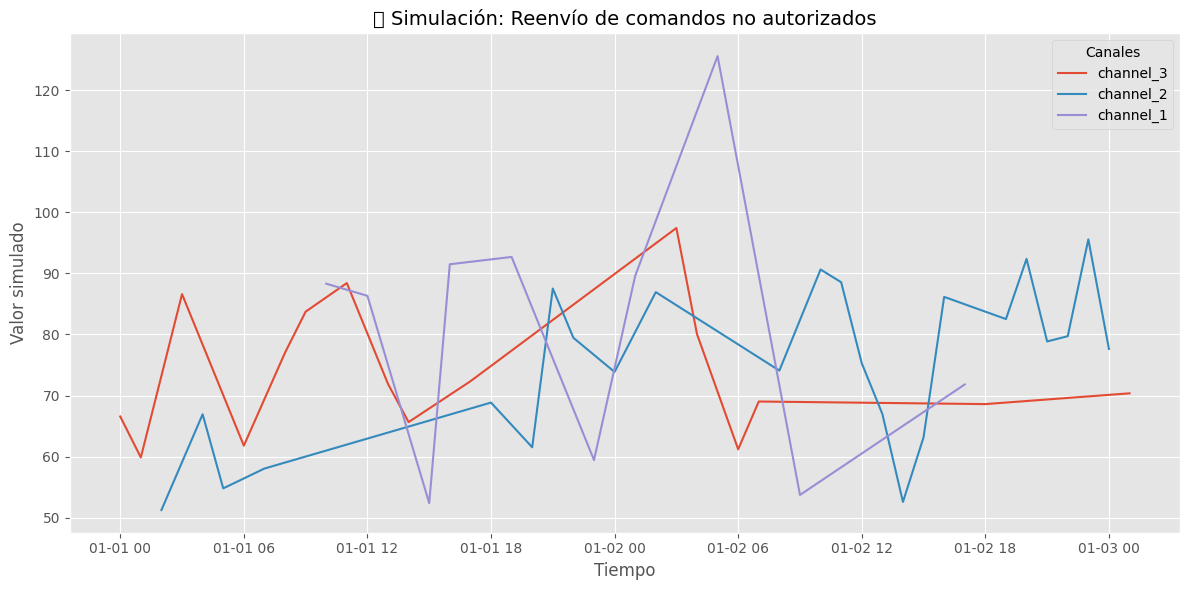


üß™ Simulando Escenario 2: Interceptaci√≥n de telemetr√≠a
üñºÔ∏è Gr√°fico guardado en: figures\escenario_2.png


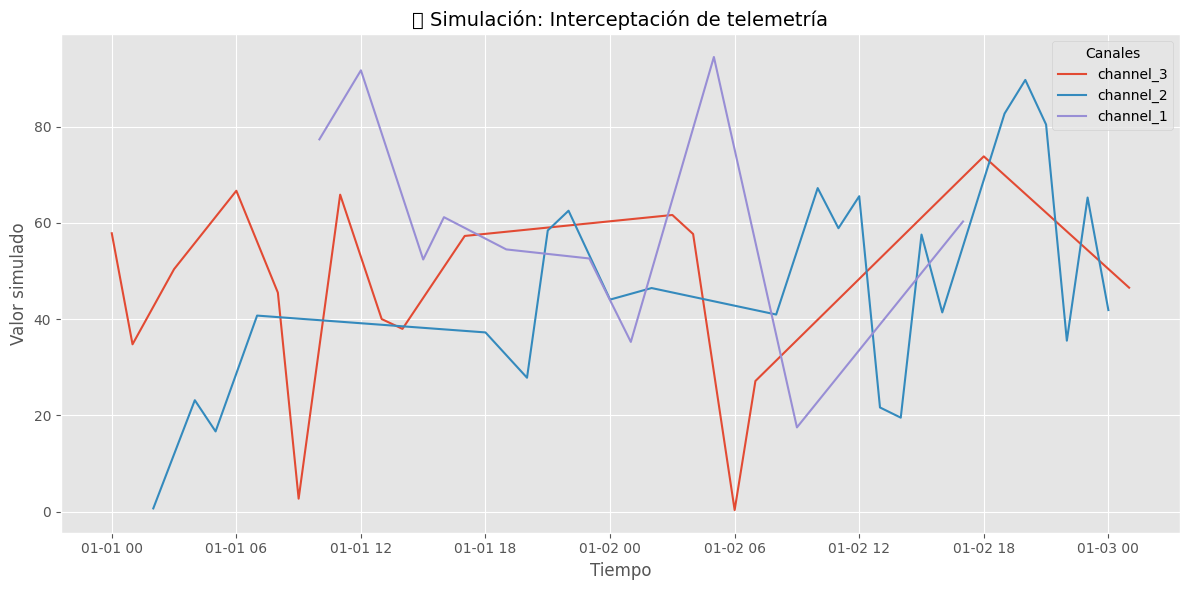


üß™ Simulando Escenario 3: DoS en subsistema de comunicaci√≥n
üñºÔ∏è Gr√°fico guardado en: figures\escenario_3.png


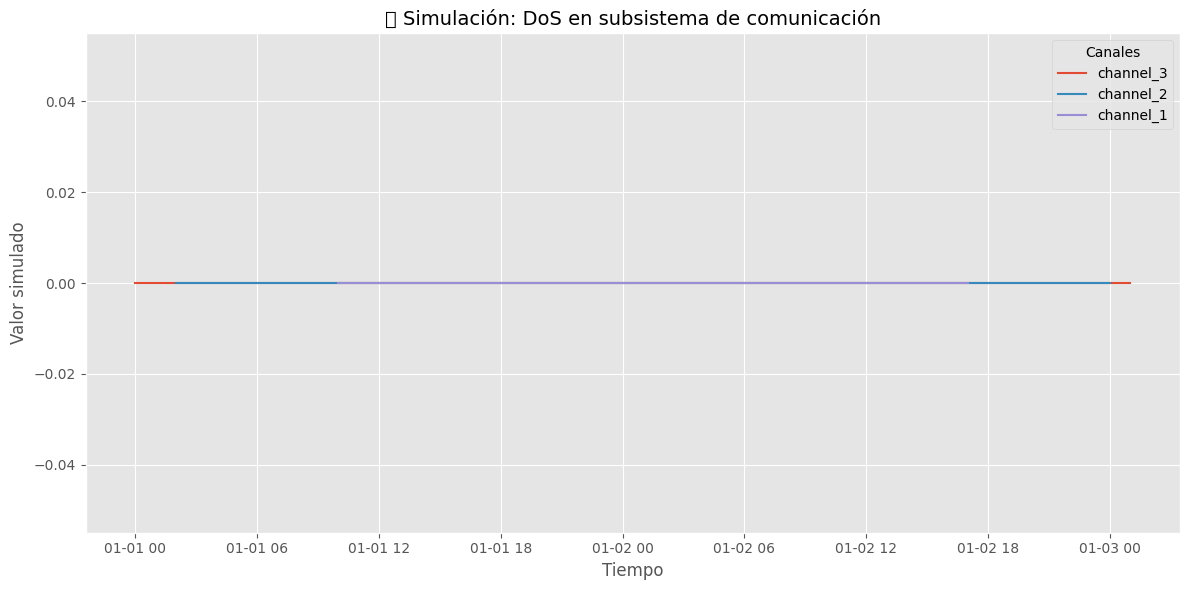

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

# Simulaci√≥n de datos (usa los reales si ya tienes anomaly_data)
anomaly_data = pd.DataFrame({
    'Channel': np.random.choice(['channel_1', 'channel_2', 'channel_3'], 50),
    'StartTime': pd.date_range('2000-01-01', periods=50, freq='H'),
    'Value': np.random.normal(50, 10, 50)
})

# Crear carpeta si no existe
output_dir = Path("figures")
output_dir.mkdir(exist_ok=True)

# Escenarios simulados
scenarios = {
    'Escenario 1': 'Reenv√≠o de comandos no autorizados',
    'Escenario 2': 'Interceptaci√≥n de telemetr√≠a',
    'Escenario 3': 'DoS en subsistema de comunicaci√≥n'
}

def plot_attack_scenario(data, scenario_type, save_path=None):
    plt.figure(figsize=(12, 6))
    plt.title(f"üî¥ Simulaci√≥n: {scenario_type}", fontsize=14)
    
    for channel in data['Channel'].unique():
        channel_data = data[data['Channel'] == channel]
        simulated = channel_data.copy()
        
        # Simulaci√≥n del impacto:
        if "comandos" in scenario_type.lower():
            simulated['Value'] *= 1.5  # aumento abrupto
        elif "interceptaci√≥n" in scenario_type.lower():
            simulated['Value'] += np.random.normal(0, 20, size=len(simulated))  # mucho ruido
        elif "dos" in scenario_type.lower():
            simulated['Value'] = 0  # p√©rdida total

        plt.plot(simulated['StartTime'], simulated['Value'], label=channel)
    
    plt.xlabel("Tiempo")
    plt.ylabel("Valor simulado")
    plt.legend(title="Canales")
    plt.grid(True)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"üñºÔ∏è Gr√°fico guardado en: {save_path}")
    
    plt.show()

# üîß Ejecutar todos los escenarios
for scenario, description in scenarios.items():
    print(f"\nüß™ Simulando {scenario}: {description}")
    filename = scenario.lower().replace(" ", "_") + ".png"
    plot_attack_scenario(
        anomaly_data,
        scenario_type=description,
        save_path=output_dir / filename
    )


C:\Users\JMGY-\AppData\Local\Temp\ipykernel_25676\517344953.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range("2024-01-01 00:00", periods=10, freq="H")
C:\Users\JMGY-\AppData\Local\Temp\ipykernel_25676\517344953.py:42: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


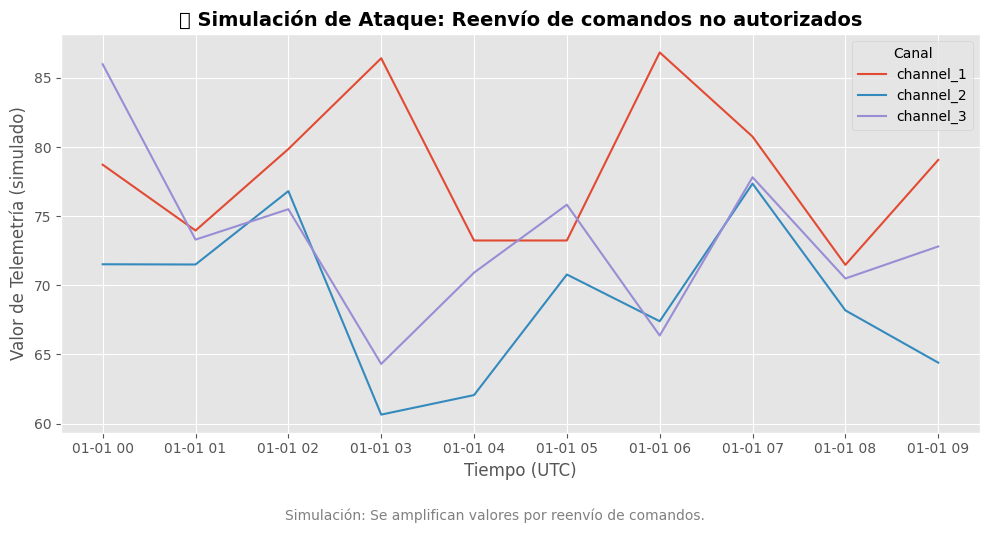

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Simulamos un peque√±o dataset como el tuyo
np.random.seed(42)
dates = pd.date_range("2024-01-01 00:00", periods=10, freq="H")
channels = ['channel_1', 'channel_2', 'channel_3']
data = pd.DataFrame({
    'StartTime': np.tile(dates, len(channels)),
    'Channel': np.repeat(channels, len(dates)),
    'Value': np.random.normal(50, 5, size=len(dates)*len(channels))
})

# Simulaci√≥n de un escenario
def plot_attack_scenario(data, scenario_type, save_path=None):
    plt.figure(figsize=(10, 5))
    plt.title(f"üî¥ Simulaci√≥n de Ataque: {scenario_type}", fontsize=14, fontweight='bold')
    
    for ch in data['Channel'].unique():
        d = data[data['Channel'] == ch].copy()

        if "comandos" in scenario_type.lower():
            d['Value'] *= 1.5
            footnote = "Simulaci√≥n: Se amplifican valores por reenv√≠o de comandos."
        elif "interceptaci√≥n" in scenario_type.lower():
            d['Value'] += np.random.normal(0, 20, size=len(d))
            footnote = "Simulaci√≥n: Se introduce ruido aleatorio por interceptaci√≥n."
        elif "dos" in scenario_type.lower():
            d['Value'] = 0
            footnote = "Simulaci√≥n: P√©rdida total de se√±al por ataque DoS."
        else:
            footnote = "Simulaci√≥n sin transformaci√≥n espec√≠fica."

        plt.plot(d['StartTime'], d['Value'], label=ch)

    plt.xlabel("Tiempo (UTC)")
    plt.ylabel("Valor de Telemetr√≠a (simulado)")
    plt.legend(title="Canal")
    plt.grid(True)
    plt.tight_layout()
    plt.figtext(0.5, -0.05, footnote, ha='center', fontsize=10, color='gray')

    if save_path:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

# Ejemplo: Reenv√≠o de comandos no autorizados
plot_attack_scenario(data, scenario_type="Reenv√≠o de comandos no autorizados")


In [112]:
import os

# Nombre del notebook actual (aj√∫stalo si cambi√≥)
notebook_name = "01_EDA.ipynb"

# Ruta de salida
output_dir = r"C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\REPORTS"

# Crear carpeta si no existe
os.makedirs(output_dir, exist_ok=True)

# Comando para exportar
os.system(f'jupyter nbconvert --to html "{notebook_name}" --output-dir "{output_dir}"')

print("‚úÖ Informe HTML generado en la carpeta REPORTS.")


‚úÖ Informe HTML generado en la carpeta REPORTS.
